In [2]:
# imports
%cd '/home/naodell/work/wbr/analysis'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scripts.plot_tools as pt
from seaborn import heatmap
pt.set_default_style()

%connect_info

/home/naodell/work/wbr/analysis
{
  "shell_port": 35983,
  "iopub_port": 38687,
  "stdin_port": 59745,
  "control_port": 57969,
  "hb_port": 35609,
  "ip": "127.0.0.1",
  "key": "73b85b47-205aec38de6b0514738fed0a",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-6582cd1d-9951-4d23-bbb5-332467f8f106.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


## Z pt reweighting

In [4]:
selection = 'mumu'
input_dir = f'local_data/flatuples/updated_e_sf/{selection}_2016'
datasets = ['zjets_m-50_alt']
dm = pt.DataManager(input_dir     = input_dir,
                    dataset_names = datasets,
                    selection     = selection,
                    period        = 2016,
                    scale         = 1,
                    cuts          = 'lepton1_q != lepton2_q',
                    combine       = False
                   )
df = dm.get_dataframe('zjets_m-50_alt')

Loading dataframes: 100%|███████████████| 1.00/1.00 [00:02<00:00, 2.91s/it]


/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: Use

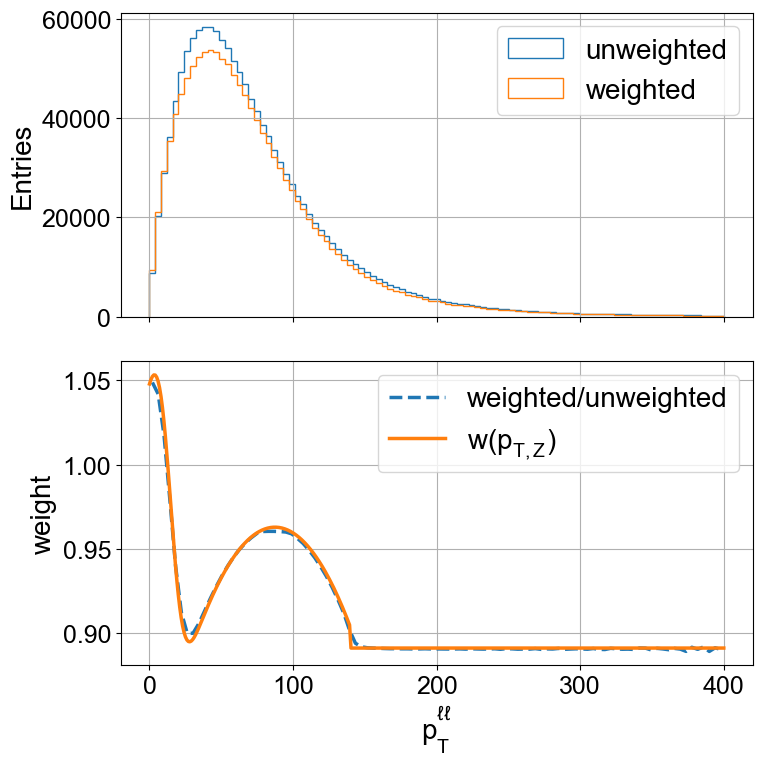

1.0682669056881462


In [5]:
fig, axes = plt.subplots(2, 1, facecolor='white', figsize=(8, 8), sharex=True)

ax = axes[0]
bins = np.linspace(0, 400, 100)
h1, _, _ = ax.hist(df['dilepton1_pt'], bins=bins, histtype='step', label='unweighted')
h2, _, _ = ax.hist(df['dilepton1_pt'], bins=bins, histtype='step', weights=df['z_pt_weight'], label='weighted')
#h3, _, _ = ax.hist(df['dilepton1_pt'], bins=bins, histtype='step', weights=df['weight'], label='_nolegend_')
ax.grid()
ax.set_ylabel('Entries')
ax.legend()

ax = axes[1]
x = (bins[1:] + bins[:-1])/2
#x = bins[:-1] + dx
ax.plot(x, h2/h1, 'C0--', label='weighted/unweighted')
#plt.plot(df[:1000]['dilepton1_pt'], df[:1000]['z_pt_weight'], 'k.')

# Z pt weight
from scipy.special import erf
def z_pt_weight(zpt):
    if zpt < 140:
        weight = (0.876979 + 4.11598e-3*zpt - 2.3552e-5*zpt*zpt)
        weight *= 1.10211*(0.958512 - 0.131835*erf((zpt - 14.1972)/10.1525))
        return weight
    else:                                                                     
        return 0.891188;                                                     
    
xx = np.linspace(0, 400, 400)
ax.plot(xx, [z_pt_weight(x) for x in xx], 'C1', label=r'$w(p_{T,Z})$')
ax.grid()
ax.set_ylabel('weight')
ax.set_xlabel(r'$p_{T}^{\ell\ell}$')
ax.legend()

plt.tight_layout()
plt.savefig('plots/z_pt_weighting.pdf')
plt.show()

print(h1.sum()/h2.sum())

# WW pt reweighting

In [6]:
selection = 'emu'
input_dir = f'local_data/flatuples/updated_e_sf/{selection}_2016'
datasets = ['ww_qq', 'ww_gg']
dm = pt.DataManager(input_dir     = input_dir,
                    dataset_names = datasets,
                    selection     = selection,
                    period        = 2016,
                    scale         = 35.9e3,
                    cuts          = 'lepton1_q != lepton2_q and n_jets == 0 and n_bjets == 0',
                    combine       = False
                   )
df = dm.get_dataframe('ww_qq')

Loading dataframes: 100%|███████████████| 2.00/2.00 [00:00<00:00, 6.03it/s]


/home/naodell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[f

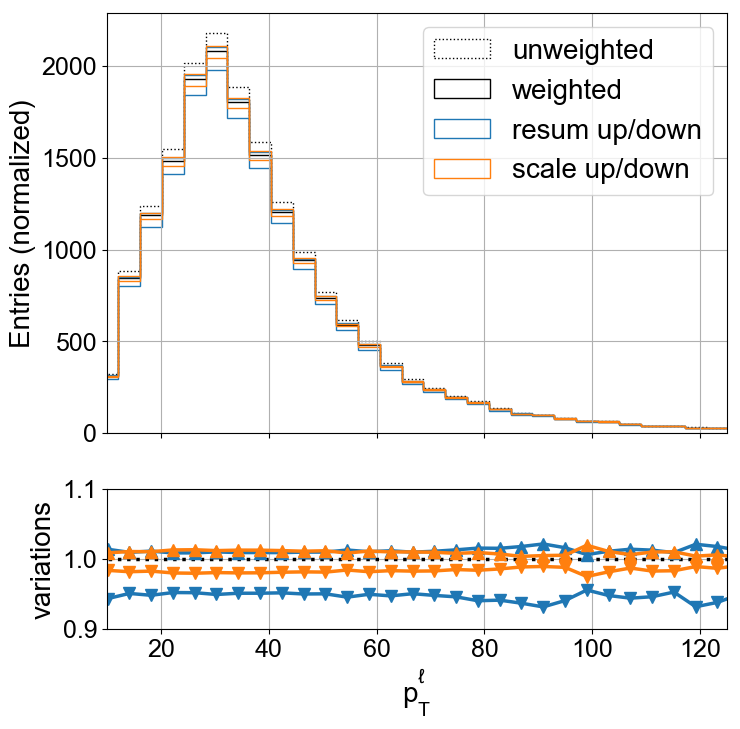

In [7]:
fig, axes = plt.subplots(2, 1, facecolor='white', figsize=(8, 8), sharex=True, gridspec_kw={'height_ratios':[3, 1]})

ax = axes[0]
bins = np.linspace(0, 400, 100)

h1, _, _ = ax.hist(df['trailing_lepton_pt'], color='k', linestyle=':', bins=bins, histtype='step', weights=df['weight']/df['ww_pt_weight'], label='unweighted')
h2, _, _ = ax.hist(df['trailing_lepton_pt'], color='k', bins=bins, histtype='step', weights=df['weight'], label='weighted')
h3, _, _ = ax.hist(df['trailing_lepton_pt'], bins=bins, color='C0', histtype='step', weights=df['weight']*df['ww_pt_resum_up'], label='resum up/down')
h4, _, _ = ax.hist(df['trailing_lepton_pt'], bins=bins, color='C0', histtype='step', weights=df['weight']*df['ww_pt_resum_down'], label='_nolegend_')
h5, _, _ = ax.hist(df['trailing_lepton_pt'], bins=bins, color='C1', histtype='step', weights=df['weight']*df['ww_pt_scale_up'], label='scale up/down')
h6, _, _ = ax.hist(df['trailing_lepton_pt'], bins=bins, color='C1', histtype='step', weights=df['weight']*df['ww_pt_scale_down'], label='_nolegend_')
ax.grid()
ax.set_ylabel('Entries (normalized)')
ax.legend()

ax = axes[1]
x = (bins[1:] + bins[:-1])/2
#x = bins[:-1] + dx
ax.plot([0, 400], [1., 1.], 'k:', label='weighted/unweighted')
#ax.plot(x, h2/h1, 'C1--', label='weighted/unweighted')
ax.plot(x, h3/h2, 'C0-', marker='^', label='_nolegend_')
ax.plot(x, h4/h2, 'C0-', marker='v', label='_nolegend_')
ax.plot(x, h5/h2, 'C1-', marker='^', label='_nolegend_')
ax.plot(x, h6/h2, 'C1-', marker='v', label='_nolegend_')
#plt.plot(df[:1000]['dilepton1_pt'], df[:1000]['z_pt_weight'], 'k.')
ax.grid()
ax.set_xlim(10, 125)
ax.set_ylim(0.9, 1.1)
#ax.set_xlabel(r'$p_{T}^{\ell\ell}$')
ax.set_xlabel(r'$p_{T}^{\ell}$')
ax.set_ylabel('variations')
#ax.legend()

plt.savefig(r'plots/systematics/ww_pt_lepton_pt.pdf')
plt.show()

0.9294573273131718 0.07054267268682819 18631.8618278466


/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: Use

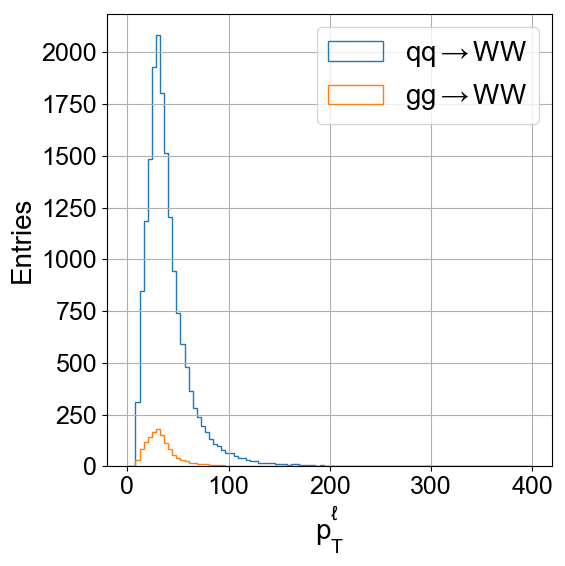

In [8]:
# compare qq/gg->WW
fig, ax = plt.subplots(1, 1, facecolor='white', figsize=(6, 6), sharex=True)
df_qq = dm.get_dataframe('ww_qq')
df_gg = dm.get_dataframe('ww_gg')

bins = np.linspace(0, 400, 100)
h1, _, _ = ax.hist(df_qq['trailing_lepton_pt'], bins=bins, histtype='step', weights=df_qq['weight'], label=r'$qq\rightarrow WW$')
h2, _, _ = ax.hist(df_gg['trailing_lepton_pt'], bins=bins, histtype='step', weights=df_gg['weight'], label=r'$gg\rightarrow WW$')
ax.grid()
ax.set_ylabel('Entries')
ax.set_xlabel(r'$p_{T}^{\ell}$')
ax.legend()

total = h1.sum()+h2.sum()
print(h1.sum()/total, h2.sum()/total, total)
#ax.text()

plt.tight_layout()
plt.savefig('plots/ww_processes.pdf')
plt.show()

# top pt reweighting

In [12]:
selection = 'emu'
input_dir = f'local_data/flatuples/updated_e_sf/{selection}_2016'
datasets = ['ttbar_lep']
dm = pt.DataManager(input_dir     = input_dir,
                    dataset_names = datasets,
                    selection     = selection,
                    period        = 2016,
                    scale         = 35.9e3,
                    cuts          = 'lepton1_q != lepton2_q and n_jets >= 2 and n_bjets >= 1',
                    combine       = False
                   )
df = dm.get_dataframe('ttbar_lep')

Loading dataframes: 100%|███████████████| 1.00/1.00 [00:13<00:00, 13.6s/it]


/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/home/naodell/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mathtext.py:834: MathText

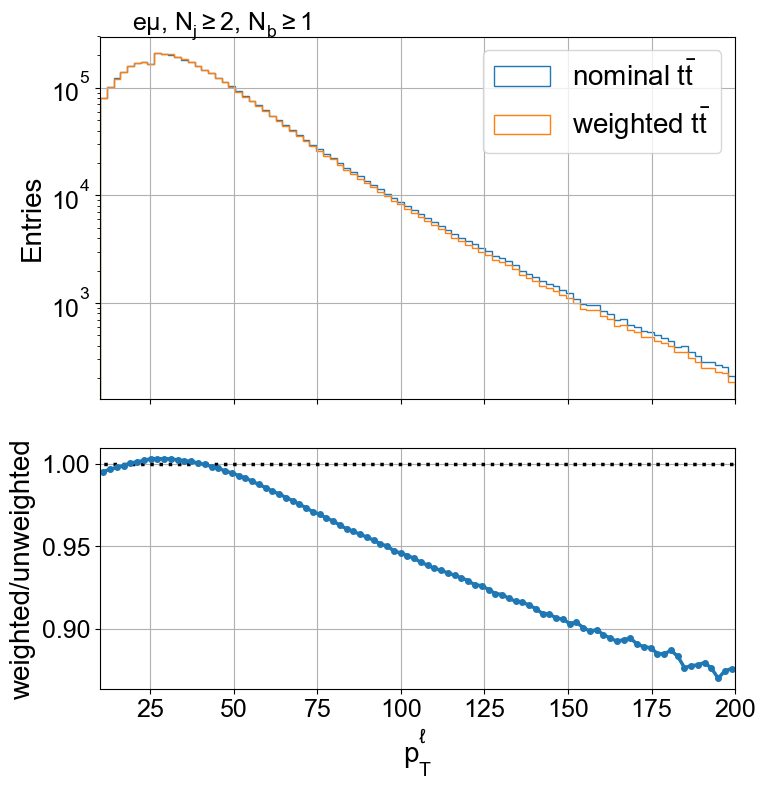

In [35]:
# compare qq/gg->WW
fig, axes = plt.subplots(2, 1, facecolor='white', figsize=(8, 8), sharex=True, gridspec_kw={'height_ratios':[3, 2]})

bins = np.linspace(10, 200, 95)
ax = axes[0]
h1, _, _ = ax.hist(df['trailing_lepton_pt'], bins=bins, histtype='step', label=r'nominal $t\bar{t}$')
h2, _, _ = ax.hist(df['trailing_lepton_pt'], bins=bins, histtype='step', weights=df['top_pt_weight'], label=r'weighted $t\bar{t}$')
ax.text(0.05, 1.02, r'$e\mu$, $N_{j} \geq 2$, $N_{b} \geq 1$', transform=ax.transAxes)
ax.grid()
ax.set_ylabel('Entries')
ax.set_yscale('log')
ax.legend()

ax = axes[1]
x = (bins[1:] + bins[:-1])/2
ax.plot([0, 200], [1., 1.], 'k:')
ax.plot(x, h2/h1, 'C0-', marker='.')
ax.set_xlabel(r'$p_{T}^{\ell}$')
ax.set_ylabel('weighted/unweighted')
ax.set_xlim(10, 200)
ax.grid()

plt.tight_layout()
plt.savefig('plots/top_pt_weight.pdf')
plt.show()